# Import the Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as py

# Load Dataset

In [2]:
data = pd.read_csv('H:\jupyternotebook\project\Restaurant Rating Prediction\zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [3]:
data.shape

(51717, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Deleting Unnnecessary Columns

In [7]:
del data['url']
del data['address']
del data['phone']
del data['reviews_list']
del data['menu_item']
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


## Checking for duplicate values

In [8]:
data.duplicated().sum()

108

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

# Drop null values

In [11]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Renaming columes appropriately

In [12]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
data= data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                      'listed_in(city)':'city'})
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [14]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


# Cleaning the dataset

In [15]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

# Replacing the "," with nothing and converting the results to float

In [16]:
data['cost']=data['cost'].str.replace(',','')
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [17]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
data=data.loc[data.rate !='NEW'] #getting rid of new

In [19]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
data['rate']=data['rate'].str.replace('/5','')
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1350',
       '2200', '1400', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23218 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          23218 non-null  object
 1   online_order  23218 non-null  object
 2   book_table    23218 non-null  object
 3   rate          23218 non-null  object
 4   votes         23218 non-null  int64 
 5   location      23218 non-null  object
 6   rest_type     23218 non-null  object
 7   dish_liked    23218 non-null  object
 8   cuisines      23218 non-null  object
 9   cost          23218 non-null  object
 10  type          23218 non-null  object
 11  city          23218 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.3+ MB


# Data Visualisations

In [22]:
## Most Famous restaurants chains in bangaluru

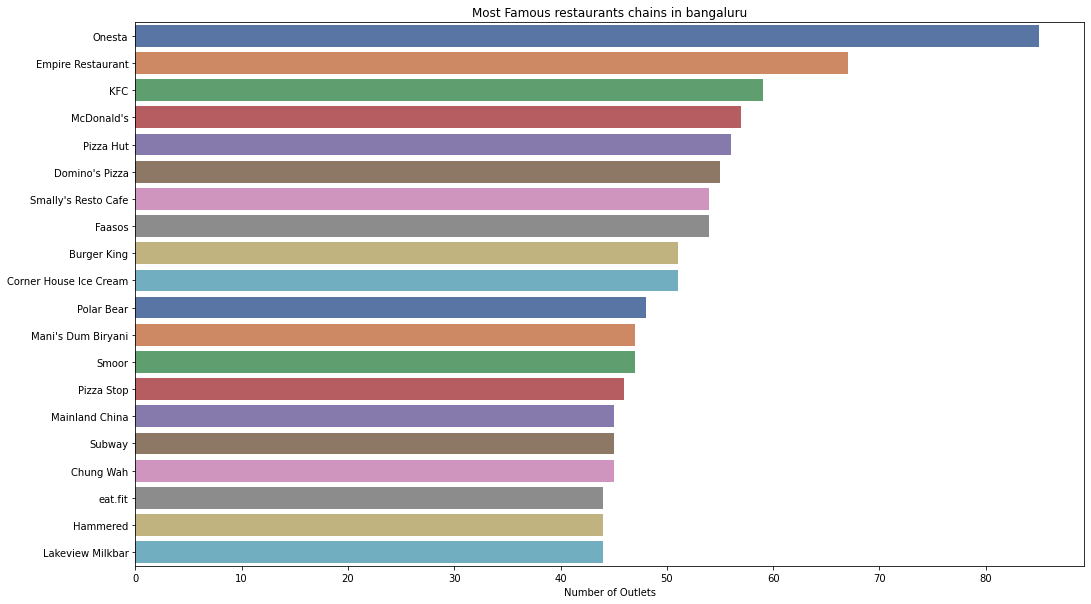

In [23]:
plt.figure(figsize=(17,10))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index, palette='deep')
plt.title("Most Famous restaurants chains in bangaluru")
plt.xlabel("Number of Outlets")
plt.show()

# Weather restaurant offer Table booking or not

In [29]:
x =data['book_table'].value_counts()
colors =['#80080','#0000A0']

trace=go.Pie(labels=x.index, values=x, textinfo='value',
             marker=dict(colors=colors,line=dict(color='#001000', width=2)))
layout=go.Layout(title='Table Booking', width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

# Insight

# Most of the Restaurants do not offer Table Booking

# Weather Restaurants Deliver online or not

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



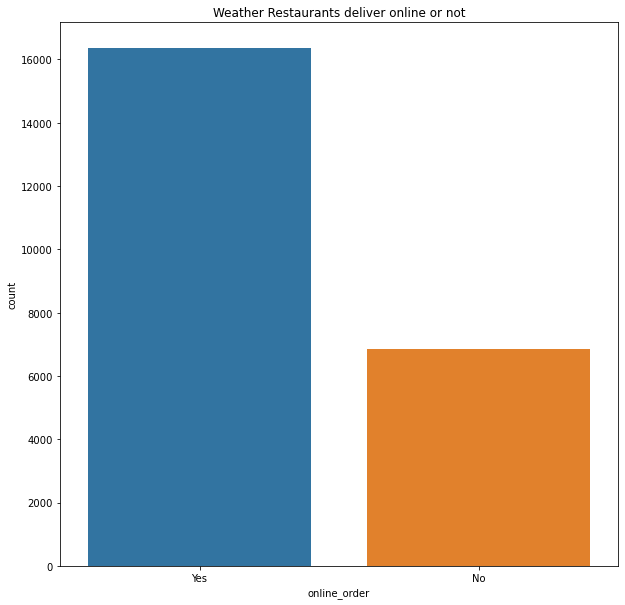

In [31]:
sns.countplot(data['online_order'])
fig =plt.gcf()
fig.set_size_inches(10,10)
plt.title("Weather Restaurants deliver online or not")
plt.show()

# Rating Distributions

C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='rate', ylabel='Density'>

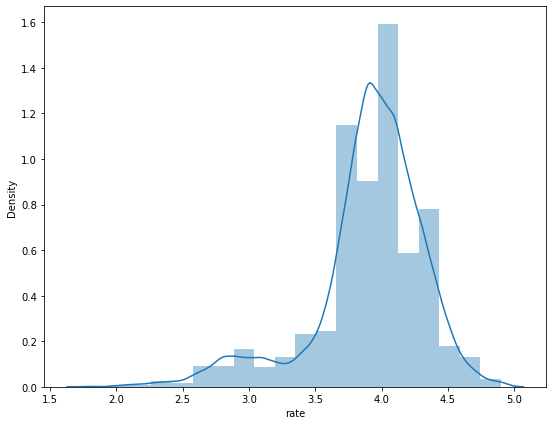

In [39]:
plt.figure(figsize=(9,7))

sns.distplot(data['rate'],bins=20)